In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.shape

(10000, 14)

In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
144,145,15612350,Taylor,691,France,Female,31,5,40915.55,1,1,0,126213.84,1
9826,9827,15686917,Tu,789,Spain,Female,40,4,0.00,2,1,0,137402.27,0
3597,3598,15671630,McMillan,796,Germany,Female,40,1,99745.95,1,1,0,177524.19,0
5217,5218,15796434,Farnsworth,724,France,Male,28,5,97612.12,1,1,1,96498.14,0
570,571,15728505,Ts'ao,601,France,Male,44,1,100486.18,2,1,1,62678.53,0
4804,4805,15567802,Childs,450,Spain,Female,34,2,0.00,2,1,0,175480.93,0
7681,7682,15633608,Black,641,France,Male,33,2,146193.60,2,1,1,55796.83,1
4642,4643,15657449,Chukwuma,446,Germany,Male,25,3,136202.78,1,1,0,176743.51,0
6560,6561,15719778,Chiu,577,France,Female,32,1,0.00,2,1,0,9902.39,0
2141,2142,15758372,Wallace,674,France,Male,18,7,0.00,2,1,1,55753.12,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [13]:
# Apply One-Hot Encoding to 'Geography' and 'Gender' columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Convert only the boolean columns to integers
for column in df.select_dtypes(include=['bool']).columns:
    df[column] = df[column].astype(int)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [17]:
X_train.shape

(7000, 11)

In [18]:
X_test.shape

(3000, 11)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [27]:
import tensorflow

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# model = Sequential()

# model.add(Dense(3,activation='sigmoid',input_dim=11))
# model.add(Dense(1,activation='sigmoid'))

In [23]:
# model.summary()

### Weights & Biases

Layer#0 <br>
11x3=33, bias = 3 -> 33 + 3 = 36

Layer#1 <br>
3x1 = 3, bias = 1 -> 3 + 1 = 4

Total Weights and bias = 40

In [24]:
# model.compile(loss='binary_crossentropy',optimizer = 'Adam')

In [28]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

### Weights & Biases

Layer#0 <br>
11x11=121, bias = 11 -> 121 + 11 = 132


Layer#1 <br>
11x11=121, bias = 11 -> 121 + 11 = 132

Layer#2 <br>
11x1 = 11, bias = 1 -> 11 + 1 = 12


Total Weights and bias = 132 + 132 + 12 = 276

In [30]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [38]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8707 - loss: 0.3132 - val_accuracy: 0.8579 - val_loss: 0.3404
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8684 - loss: 0.3148 - val_accuracy: 0.8564 - val_loss: 0.3408
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3352 - val_accuracy: 0.8621 - val_loss: 0.3406
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3051 - val_accuracy: 0.8621 - val_loss: 0.3416
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8723 - loss: 0.3166 - val_accuracy: 0.8607 - val_loss: 0.3411
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3147 - val_accuracy: 0.8621 - val_loss: 0.3401
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8690 - loss: 0.3094 - val_accuracy: 0.8579 - val_loss: 0.3412
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3200 - val_accu

In [39]:
model.layers[0].get_weights()

[array([[ 0.03858238, -0.22420031, -0.01681721, -0.6266025 , -0.20989081,
          0.06142778,  0.37940997, -0.07328489, -0.24771157,  0.35251126,
          0.03042255],
        [-0.14777897, -0.88686234, -0.86317563,  0.16257897,  0.40970874,
         -0.15623164, -0.6168427 ,  0.8635454 ,  0.95973897,  0.21669334,
         -0.04252813],
        [-0.22166352,  0.2715229 , -0.13880469,  0.47327623,  0.34183967,
          0.09068916, -0.22127627,  0.04095753,  0.13023458, -0.3667265 ,
         -0.7553826 ],
        [-0.1412237 ,  0.8044081 , -0.3152133 ,  0.10902232, -0.29115635,
         -1.2056532 , -0.37293145, -0.03994425,  0.13467705, -0.43173394,
         -0.39176258],
        [ 0.8963622 ,  0.31051487,  0.27039748,  0.09769104, -0.20740189,
         -0.36954635,  0.50154245,  1.2702041 , -0.8757668 , -0.0617438 ,
          0.84605455],
        [-0.1396701 , -0.05270199, -0.11519326,  0.13303053, -0.10293841,
         -0.33201933, -0.17485566,  0.09710611, -0.09671295, -0.1030519

In [40]:
model.layers[1].get_weights()

[array([[ 0.0310335 , -1.6620785 ,  0.44495952, -0.23694053,  0.57595825,
          0.7676202 , -0.21861057,  0.6303983 , -2.3265915 , -0.5872074 ,
         -0.9188383 ],
        [ 0.75220317, -0.01738972,  0.5006865 ,  0.3365139 ,  0.32658303,
          0.12521514, -0.30021894, -0.28286648,  0.35312682,  0.635371  ,
          0.10780545],
        [ 0.32254407,  0.4900545 ,  0.36105153, -0.05606059,  0.20877326,
         -0.6635841 , -0.10975173, -0.20193051, -0.9668967 ,  0.15085724,
          0.07975765],
        [ 0.58192736,  0.1824026 ,  0.04418995,  0.05584448,  0.38734588,
          0.23284973,  0.6659609 ,  0.35506842, -0.31785247, -0.10554722,
          0.3851857 ],
        [ 0.44933286,  0.04753594, -0.52645636,  0.35915   , -0.06810836,
         -0.10165253, -0.17604007, -1.1253343 ,  0.16872586, -0.05856995,
          0.83228344],
        [-0.1459461 ,  0.13534035, -1.0506074 ,  0.50644547, -0.6812133 ,
         -0.3075883 , -0.12908809, -0.4263898 ,  0.17083313, -0.3118535

In [41]:
y_log = model.predict(X_test_scaled)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [42]:
y_pred = np.where(y_log > 0.5,1,0)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [44]:
accuracy_score(Y_test,y_pred)

0.8513333333333334

In [47]:
import matplotlib.pyplot as plt

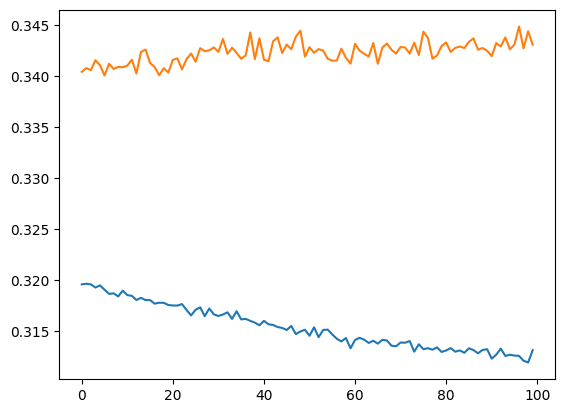

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

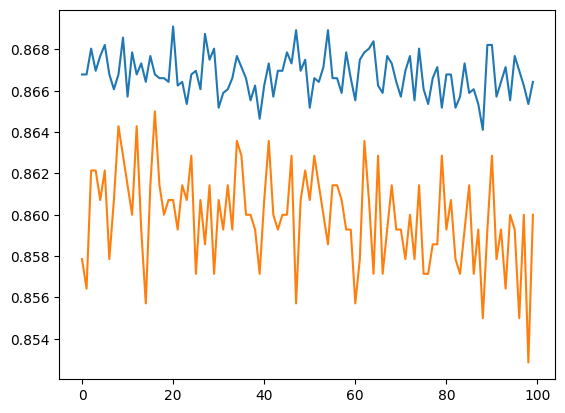

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])